<a href="https://colab.research.google.com/github/so-omaa/AI1-Final-Project/blob/main/2_face_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# 라이브러리 임포트

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import os
import glob
import cv2
from google.colab.patches import cv2_imshow

# 데이터 전처리
kaggle 'Human Faces' Datasets
> Male and female Image dataset with special attention to senior citizens' pictures and a small of portion real-like fake faces to improve identification over wide range of input pictures.

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/indian/humans')  # 데이터 디렉토리 설정
image_count = len(list(data_dir.glob('*.jpg')))  # 'data_dir' 내 확장자가 jpg인 파일 개수 확인
print(image_count)

6991


In [ ]:
# os.chdir(data_dir)
# files = os.listdir(data_dir)

In [ ]:
import pandas as pd
import itertools

df = pd.read_csv('/content/drive/MyDrive/indian/num2name.csv', encoding = 'utf-8')
df

,num,total_name,name1,name2,name3
0,4,어두운 나무의 전사,어두운,나무,의 전사
1,14,어두운 매은(는) 맨날 잠잔다,어두운,매,은(는) 맨날 잠잔다
2,33,조용한 황소와(과) 함께 춤을,조용한,황소,와(과) 함께 춤을
3,39,욕심많은 늑대의 전사,욕심많은,늑대,의 전사
4,62,욕심많은 나무은(는) 맨날 잠잔다,욕심많은,나무,은(는) 맨날 잠잔다
...,...,...,...,...,...
545,6420,웅크린 돼지의 아래에서,웅크린,돼지,의 아래에서
546,6430,말 많은 양의 정령,말 많은,양,의 정령
547,6437,욕심많은 늑대은(는) 그림자 속에,욕심많은,늑대,은(는) 그림자 속에
548,6441,말 많은 양을(를) 보라,말 많은,양,을(를) 보라


In [ ]:
df['num']

0         4
1        14
2        33
3        39
4        62
       ... 
545    6420
546    6430
547    6437
548    6441
549    6451
Name: num, Length: 550, dtype: int64

In [ ]:
df['name1']

0       어두운
1       어두운
2       조용한
3      욕심많은
4      욕심많은
       ... 
545     웅크린
546    말 많은
547    욕심많은
548    말 많은
549      푸른
Name: name1, Length: 550, dtype: object

In [ ]:
num2name1 = df[['num', 'name1']]
num2name2 = df[['num', 'name2']]
num2name3 = df[['num', 'name3']]
num2name1

,num,name1
0,4,어두운
1,14,어두운
2,33,조용한
3,39,욕심많은
4,62,욕심많은
...,...,...
545,6420,웅크린
546,6430,말 많은
547,6437,욕심많은
548,6441,말 많은


In [ ]:
name1_list = ['말 많은', '푸른', '어두운', '조용한', '웅크린', '용감한', '날카로운', '욕심많은']
name2_list = ['늑대', '태양', '양', '매', '황소', '나무', '달빛', '돼지', '하늘', '바람']
name3_list = ['와(과) 함께 춤을', '의 정령', '은(는) 그림자 속에', '의 아래에서', '이(가) 노래하다',
              '을(를) 보라', '의 고향', '은(는) 맨날 잠잔다', '의 전사', '은(는) 나의 친구']

In [ ]:
dict = df.set_index('num').T.to_dict('list')  # 각 파일의 레이블 딕셔너리 생성
dict

{4: ['어두운 나무의 전사', '어두운', '나무', '의 전사'],
 14: ['어두운 매은(는) 맨날 잠잔다', '어두운', '매', '은(는) 맨날 잠잔다'],
 33: ['조용한 황소와(과) 함께 춤을', '조용한', '황소', '와(과) 함께 춤을'],
 39: ['욕심많은 늑대의 전사', '욕심많은', '늑대', '의 전사'],
 62: ['욕심많은 나무은(는) 맨날 잠잔다', '욕심많은', '나무', '은(는) 맨날 잠잔다'],
 85: ['조용한 황소의 전사', '조용한', '황소', '의 전사'],
 93: ['어두운 황소와(과) 함께 춤을', '어두운', '황소', '와(과) 함께 춤을'],
 104: ['용감한 늑대의 전사', '용감한', '늑대', '의 전사'],
 110: ['욕심많은 매이(가) 노래하다', '욕심많은', '매', '이(가) 노래하다'],
 136: ['웅크린 바람의 고향', '웅크린', '바람', '의 고향'],
 138: ['욕심많은 황소은(는) 그림자 속에', '욕심많은', '황소', '은(는) 그림자 속에'],
 155: ['웅크린 하늘의 정령', '웅크린', '하늘', '의 정령'],
 165: ['욕심많은 나무의 전사', '욕심많은', '나무', '의 전사'],
 168: ['날카로운 매을(를) 보라', '날카로운', '매', '을(를) 보라'],
 170: ['어두운 나무의 정령', '어두운', '나무', '의 정령'],
 177: ['말 많은 바람와(과) 함께 춤을', '말 많은', '바람', '와(과) 함께 춤을'],
 202: ['욕심많은 황소은(는) 그림자 속에', '욕심많은', '황소', '은(는) 그림자 속에'],
 215: ['푸른 황소의 전사', '푸른', '황소', '의 전사'],
 216: ['푸른 태양의 전사', '푸른', '태양', '의 전사'],
 251: ['욕심많은 황소의 전사', '욕심많은', '황소', '의 전사'],
 257: ['날카로운 나무은(는) 그림자 속에', '날카

In [ ]:
img_names = list(dict.keys())
print(img_names)

[4, 14, 33, 39, 62, 85, 93, 104, 110, 136, 138, 155, 165, 168, 170, 177, 202, 215, 216, 251, 257, 273, 292, 298, 319, 329, 352, 366, 406, 428, 444, 460, 468, 479, 487, 492, 500, 505, 508, 517, 532, 548, 551, 558, 579, 587, 603, 618, 634, 644, 647, 653, 672, 673, 674, 686, 697, 705, 707, 725, 730, 751, 770, 776, 779, 786, 824, 828, 830, 865, 868, 871, 873, 880, 888, 944, 970, 995, 1003, 1017, 1028, 1031, 1040, 1043, 1075, 1089, 1092, 1101, 1108, 1123, 1146, 1150, 1153, 1162, 1176, 1193, 1208, 1222, 1264, 1281, 1291, 1297, 1359, 1361, 1390, 1402, 1408, 1424, 1438, 1449, 1473, 1477, 1480, 1485, 1489, 1496, 1505, 1511, 1525, 1531, 1540, 1551, 1556, 1562, 1578, 1587, 1588, 1590, 1621, 1626, 1633, 1639, 1647, 1651, 1655, 1673, 1678, 1684, 1690, 1697, 1701, 1703, 1729, 1736, 1739, 1761, 1779, 1790, 1813, 1816, 1827, 1864, 1868, 1871, 1898, 1900, 1915, 1919, 1925, 1944, 1951, 1965, 1968, 1981, 1986, 1990, 2001, 2004, 2014, 2017, 2030, 2032, 2035, 2046, 2061, 2065, 2071, 2082, 2099, 2136, 2157,

이미지 분류를 수행하기 위해 'name1', 'name2', 'name3' 각 레이블에 따라 생성한 폴더에 해당하는 이미지 파일을 배치

In [ ]:
import shutil

In [ ]:
def createFolder(directory) :
  try :
    if not os.path.exists(directory) :
      os.makedirs(directory)
  except OSError :
    print('Error : Creating directory. ' + directory)

for i in range(len(name1_list)) :  # 'name1' 레이블 개수만큼
  createFolder(f'{name1_list[i]}')  # 레이블 폴더를 생성

  for i in range(len(name2_list)) :  # 'name2' 레이블 개수만큼
  createFolder(f'{name2_list[i]}')  # 레이블 폴더를 생성

for i in range(len(name3_list)) :  # 'name3' 레이블 개수만큼
  createFolder(f'{name3_list[i]}')  # 레이블 폴더를 생성

In [ ]:
# train_folder = os.listdir(os.getcwd())
# len(train_folder)

In [ ]:
for i in range(len(train_folder)) :
  if train_folder[i][-3 :] == 'jpg' and int(train_folder[i][: -4]) in dict :  # 확장자가 jpg이고 파일명이 'dict'에 있으면
    name1 = dict[int(train_folder[i][:-4])][1]
    name2 = dict[int(train_folder[i][:-4])][2]
    name3 = dict[int(train_folder[i][:-4])][3]
    print(name1, name2, name3)
    shutil.copyfile(f'{train_folder[i]}', f'{name1}/{train_folder[i]}')
    shutil.copyfile(f'{train_folder[i]}', f'{name2}/{train_folder[i]}')
    shutil.copyfile(f'{train_folder[i]}', f'{name3}/{train_folder[i]}')

# 이미지 분류 모델
'total_name'이 아닌 'name1', 'name2', 'name3' 각 레이블을 분류하도록 모델을 학습

In [ ]:
import pathlib

data_dir = '/content/drive/MyDrive/indian/humans'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/indian/humans')

In [ ]:
# image_count = len(list(data_dir.glob('*/*.jpg')))
# image_count  # name1, name2, name3 각 550개씩 총 1650개

In [ ]:
# ex1 = list(data_dir.glob('나무/*'))
# PIL.Image.open(str(ex1[0]))

In [ ]:
# len(ex1)

In [ ]:
data_dir1 = '/content/drive/MyDrive/indian/humans/name1'
data_dir1 = pathlib.Path(data_dir1)
data_dir1

data_dir2 = '/content/drive/MyDrive/indian/humans/name2'
data_dir2 = pathlib.Path(data_dir2)
data_dir2

data_dir3 = '/content/drive/MyDrive/indian/humans/name3'
data_dir3 = pathlib.Path(data_dir3)
data_dir3

PosixPath('/content/drive/MyDrive/indian/humans/name3')

In [ ]:
# 임의로 설정
batch_size = 10
img_height = 512
img_width = 512

'name1' 분류 모델

In [ ]:
train_ds1 = tf.keras.utils.image_dataset_from_directory(  # 학습 데이터셋
  data_dir1,
  validation_split = 0.2,
  subset = "training",
  seed = 13,  # 셔플
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 8 classes.
Using 440 files for training.


In [ ]:
val_ds1 = tf.keras.utils.image_dataset_from_directory(  # 검증 데이터셋
  data_dir1,
  validation_split = 0.2,
  subset = "validation",
  seed = 13,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 8 classes.
Using 110 files for validation.


In [ ]:
class_names1 = train_ds1.class_names
print(class_names1)

['날카로운', '말 많은', '어두운', '욕심많은', '용감한', '웅크린', '조용한', '푸른']


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4461 (\N{HANGUL JUNGSEONG YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4535 (\N{HANGUL JONGSEONG MIEUM}) missing from current font.
  func(

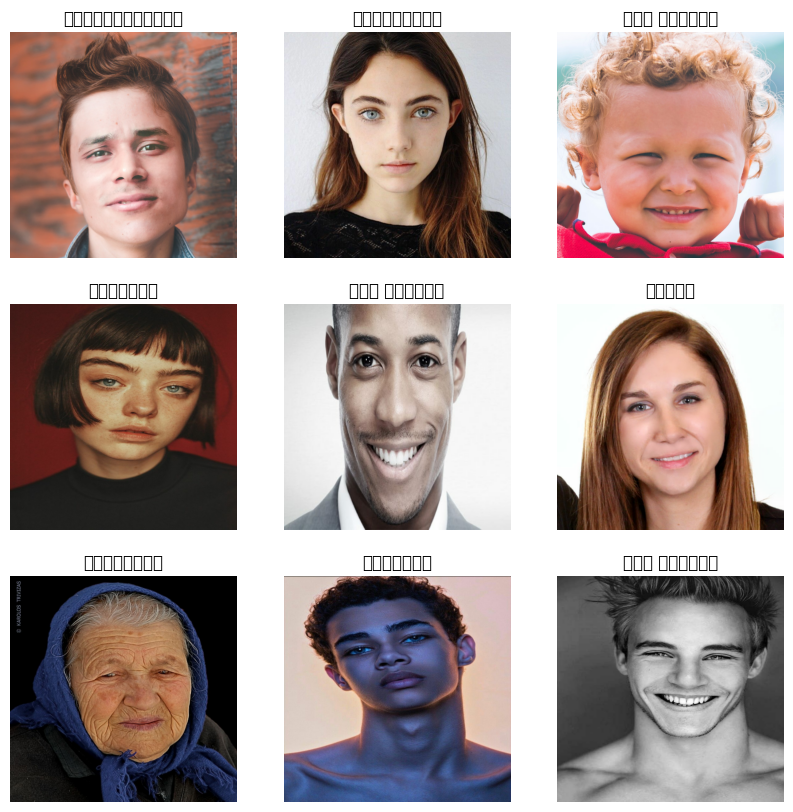

In [ ]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds1.take(1) :  # 샘플 출력
  for i in range(9) :
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names1[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch1, labels_batch1 in train_ds1 :
  print(image_batch1.shape)  # batch_size 10, 600 * 600, RGB 3
  print(labels_batch1.shape)
  break

(10, 512, 512, 3)
(10,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE  # 성능 향상 (www.tensorflow.org - Better performance with the tf.data API)

train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds1 = val_ds1.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)  # RGB 0 ~ 255를 0 ~ 1로 표준화

In [ ]:
normalized_ds1 = train_ds1.map(lambda x, y : (normalization_layer(x), y))
image_batch1, labels_batch1 = next(iter(normalized_ds1))
first_image1 = image_batch1[0]
# Notice the pixel values are now in '[0,1]'.
print(np.min(first_image1), np.max(first_image1))

0.0 1.0


데이터 증강

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal",
                    input_shape=(img_height,
                                 img_width,
                                 3)
                    ),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

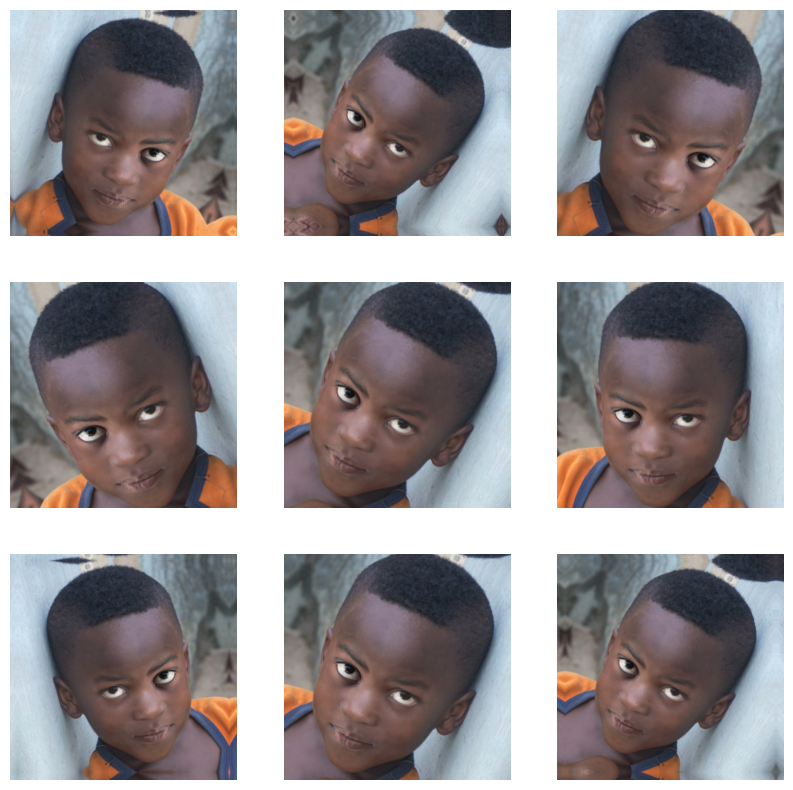

In [ ]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds1.take(1):  # 샘플 출력
    for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

In [ ]:
# from tensorflow.keras.applications.vgg16 import VGG16 RAM 부족으로 실패..

num_classes1 = len(class_names1)

model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes1)
])

# 사전학습 모델 불러오기 : 케라스에서 클래스 형태로 제공
 
# weight, include_top 파라미터 설정 
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  
#   layers.Conv2D(256, 3, padding='same', activation='relu'),
#   layers.Conv2D(256, 3, padding='same', activation='relu'),
#   layers.Conv2D(256, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),

#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),

#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),

#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(4096, activation='relu'),
#   layers.Dense(2048, activation='relu'),
#   layers.Dense(1024, activation='relu'),
#   layers.Dense(num_classes, activation='softmax', name="outputs")
# ])

In [ ]:
model1.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                  

In [ ]:
epochs = 10
history = model1.fit(
  train_ds1,
  validation_data = val_ds1,
  epochs = epochs
)

Epoch 1/10
44/44 [==============================] - 221s 5s/step - loss: 2.2423 - accuracy: 0.2227 - val_loss: 2.0087 - val_accuracy: 0.2818
Epoch 2/10
44/44 [==============================] - 194s 4s/step - loss: 1.9471 - accuracy: 0.2750 - val_loss: 1.9944 - val_accuracy: 0.2909
Epoch 3/10
44/44 [==============================] - 196s 4s/step - loss: 1.9268 - accuracy: 0.2818 - val_loss: 1.9976 - val_accuracy: 0.2727
Epoch 4/10
44/44 [==============================] - 196s 4s/step - loss: 1.8987 - accuracy: 0.2523 - val_loss: 2.0435 - val_accuracy: 0.3182
Epoch 5/10
44/44 [==============================] - 195s 4s/step - loss: 1.8644 - accuracy: 0.2886 - val_loss: 2.2265 - val_accuracy: 0.3364
Epoch 6/10
44/44 [==============================] - 182s 4s/step - loss: 1.8587 - accuracy: 0.3159 - val_loss: 2.1895 - val_accuracy: 0.1727
Epoch 7/10
44/44 [==============================] - 180s 4s/step - loss: 1.8487 - accuracy: 0.3341 - val_loss: 2.0847 - val_accuracy: 0.3091
Epoch 8/10
44

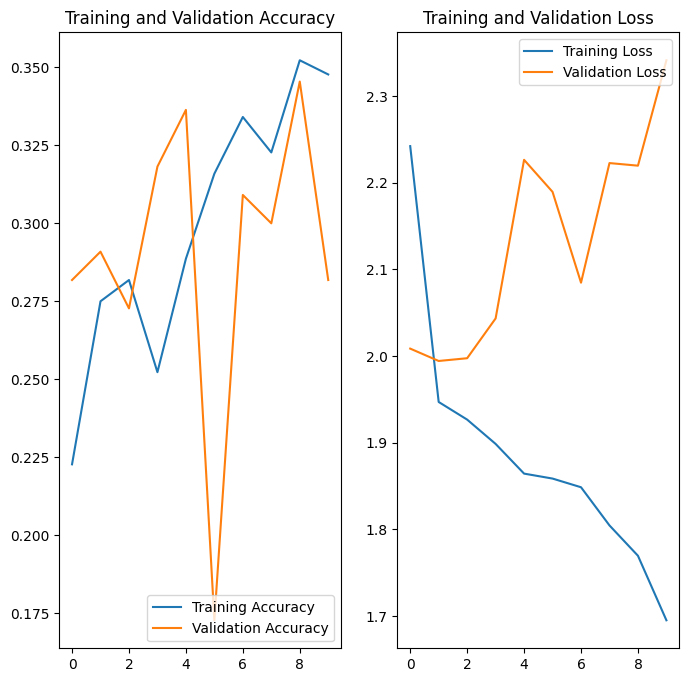

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

'name2' 분류 모델

In [ ]:
train_ds2 = tf.keras.utils.image_dataset_from_directory(  # 학습 데이터셋
  data_dir2,
  validation_split = 0.2,
  subset = "training",
  seed = 13,  # 셔플
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 10 classes.
Using 440 files for training.


In [ ]:
val_ds2 = tf.keras.utils.image_dataset_from_directory(  # 검증 데이터셋
  data_dir2,
  validation_split = 0.2,
  subset = "validation",
  seed = 13,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 10 classes.
Using 110 files for validation.


In [ ]:
class_names2 = train_ds2.class_names
print(class_names2)

['나무', '늑대', '달빛', '돼지', '매', '바람', '양', '태양', '하늘', '황소']


In [ ]:
for image_batch2, labels_batch2 in train_ds2 :
  print(image_batch2.shape)  # batch_size 10, 600 * 600, RGB 3
  print(labels_batch2.shape)
  break

(10, 512, 512, 3)
(10,)


In [ ]:
train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
normalized_ds2 = train_ds2.map(lambda x, y : (normalization_layer(x), y))
image_batch2, labels_batch2 = next(iter(normalized_ds2))
first_image2 = image_batch2[0]
# Notice the pixel values are now in '[0,1]'.
print(np.min(first_image2), np.max(first_image2))

0.0 0.9810368


In [ ]:
num_classes2 = len(class_names2)

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes2)
])

In [ ]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                  

In [ ]:
epochs = 10
history = model2.fit(
  train_ds2,
  validation_data = val_ds2,
  epochs = epochs
)

Epoch 1/10
44/44 [==============================] - 215s 5s/step - loss: 3.5848 - accuracy: 0.1295 - val_loss: 2.2944 - val_accuracy: 0.0909
Epoch 2/10
44/44 [==============================] - 192s 4s/step - loss: 2.2845 - accuracy: 0.1364 - val_loss: 2.3075 - val_accuracy: 0.0818
Epoch 3/10
44/44 [==============================] - 191s 4s/step - loss: 2.2753 - accuracy: 0.1432 - val_loss: 2.3056 - val_accuracy: 0.0818
Epoch 4/10
44/44 [==============================] - 182s 4s/step - loss: 2.2746 - accuracy: 0.1273 - val_loss: 2.3000 - val_accuracy: 0.0909
Epoch 5/10
44/44 [==============================] - 191s 4s/step - loss: 2.2717 - accuracy: 0.1341 - val_loss: 2.2900 - val_accuracy: 0.0818
Epoch 6/10
44/44 [==============================] - 191s 4s/step - loss: 2.2724 - accuracy: 0.1500 - val_loss: 2.2971 - val_accuracy: 0.0909
Epoch 7/10
44/44 [==============================] - 190s 4s/step - loss: 2.2697 - accuracy: 0.1318 - val_loss: 2.3293 - val_accuracy: 0.1091
Epoch 8/10
44

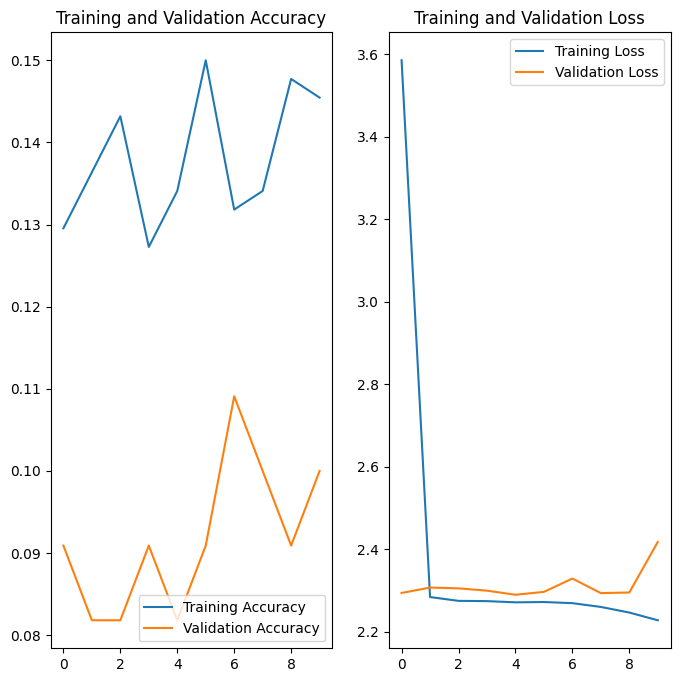

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

'name3' 분류 모델

In [ ]:
train_ds3 = tf.keras.utils.image_dataset_from_directory(  # 학습 데이터셋
  data_dir3,
  validation_split = 0.2,
  subset = "training",
  seed = 13,  # 셔플
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 10 classes.
Using 440 files for training.


In [ ]:
val_ds3 = tf.keras.utils.image_dataset_from_directory(  # 검증 데이터셋
  data_dir3,
  validation_split = 0.2,
  subset = "validation",
  seed = 13,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 550 files belonging to 10 classes.
Using 110 files for validation.


In [ ]:
class_names3 = train_ds3.class_names
print(class_names3)

['와(과) 함께 춤을', '은(는) 그림자 속에', '은(는) 나의 친구', '은(는) 맨날 잠잔다', '을(를) 보라', '의 고향', '의 아래에서', '의 전사', '의 정령', '이(가) 노래하다']


In [ ]:
for image_batch3, labels_batch3 in train_ds3 :
  print(image_batch3.shape)  # batch_size 10, 600 * 600, RGB 3
  print(labels_batch3.shape)
  break

(10, 512, 512, 3)
(10,)


In [ ]:
train_ds3 = train_ds3.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds3 = val_ds3.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
normalized_ds3 = train_ds3.map(lambda x, y : (normalization_layer(x), y))
image_batch3, labels_batch3 = next(iter(normalized_ds3))
first_image3 = image_batch3[0]
# Notice the pixel values are now in '[0,1]'.
print(np.min(first_image3), np.max(first_image3))

0.039161347 1.0


In [ ]:
num_classes3 = len(class_names3)

model3 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes3)
])

In [ ]:
model3.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                  

In [ ]:
epochs = 10
history = model3.fit(
  train_ds3,
  validation_data = val_ds3,
  epochs = epochs
)

Epoch 1/10
44/44 [==============================] - 213s 5s/step - loss: 4.1907 - accuracy: 0.1523 - val_loss: 2.2848 - val_accuracy: 0.1182
Epoch 2/10
44/44 [==============================] - 183s 4s/step - loss: 2.2671 - accuracy: 0.1727 - val_loss: 2.2633 - val_accuracy: 0.1273
Epoch 3/10
44/44 [==============================] - 190s 4s/step - loss: 2.2194 - accuracy: 0.1955 - val_loss: 2.2286 - val_accuracy: 0.1545
Epoch 4/10
44/44 [==============================] - 191s 4s/step - loss: 2.1920 - accuracy: 0.1773 - val_loss: 2.2175 - val_accuracy: 0.1455
Epoch 5/10
44/44 [==============================] - 190s 4s/step - loss: 2.1729 - accuracy: 0.2273 - val_loss: 2.2201 - val_accuracy: 0.1909
Epoch 6/10
44/44 [==============================] - 180s 4s/step - loss: 2.0962 - accuracy: 0.2432 - val_loss: 2.2519 - val_accuracy: 0.2455
Epoch 7/10
44/44 [==============================] - 189s 4s/step - loss: 2.0701 - accuracy: 0.2614 - val_loss: 2.2174 - val_accuracy: 0.2091
Epoch 8/10
44

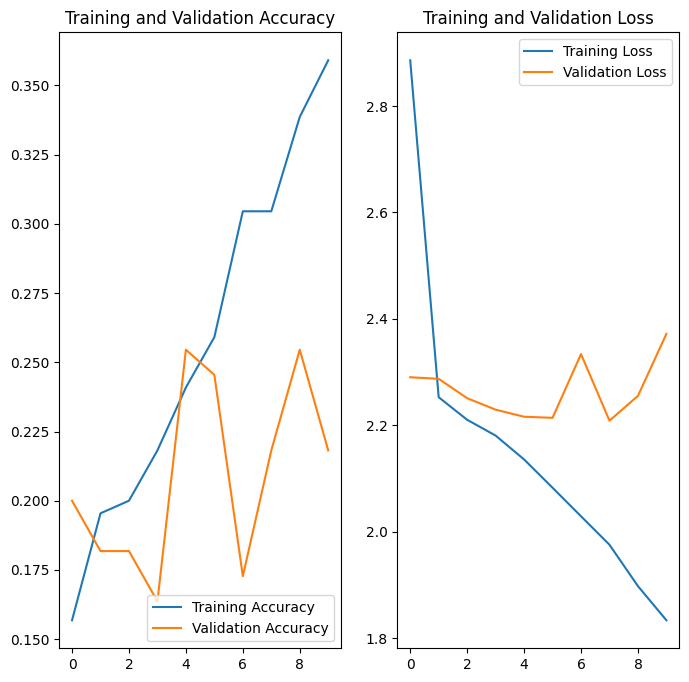

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()